### 1. 케라스로 구현하는 딥러닝Ⅰ

In [4]:
from keras import layers, models, datasets
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np


1)ANN

In [ ]:
# Nin: 입력 게층의 노드 수, Nh: 은닉 계층의 노드 수, Nout: 출력값이 가질 클래스 수(출력 노드 수)
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin, ))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


2)컬러 이미지를 분류하는 DNN구현

In [ ]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W*H*C)
    X_test = X_test.reshape(-1, W*H*C)

    X_train, X_test = X_train/255.0, X_test/255.0

    return (X_train, y_train), (X_test, y_test)

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_I, Pd_I, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_I[0], activation='relu', input_shape=(Nin, ), name='Hidden-1'))
        
        ... (중략) ...

3)CNN - Convolutional Neural Netwrok(합성곱 신경망)

    (1)필기체를 분류하는 CNN 구현

In [24]:
import keras
from keras import datasets, models, layers # models: 연쇄 방식 모델링 객체인 squential사용, layers: Conv2D, Maxpooling2D, Flatten
from keras import backend # 딥러닝 엔진 직접 제어
import matplotlib.pyplot as plt
# from keraspp.skeras import plot_loss, plot_acc # keraspp는 되는데, skeras는 안돼서 걍 수동으로 함수 작성함
import tensorflow as tf

def plot_loss(history, title=None):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

def plot_acc(history, title=None):
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

In [25]:
# Step1: 분류 CNN모델링(구축)
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPool2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.25))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])

# Step2: 분류 CNN을 위한 데이터 준비 및 전처리
class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        # CNN은 DNN과 달리, 벡터화를 할 수 없는 부분이 있기에 벡터화를 안함
        # 대신에, 흑백 이미지의 채널 정보를 처리하기 위해 추가적인 차원을 ㅣ이미지 데이터 포함시킨다
        if backend.image_data_format() == 'channels_first': # 맨 앞에 1로 채널 수 표시
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) # 샘플 수, 채널 수, 이미지가로길이, 세로길이
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) # DNN과 달리 가로,세로가 구분됨!
        else: # 맨 뒤에 1로 채널 수 표시
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
        
        x_train = x_train.astype('float32') / 255
        x_test = x_test.astype('float32') / 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

# Step3: 분류 CNN학습 및 성능 평가
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)

history = model.fit(data.x_train, data.y_train, 
                    batch_size=batch_size, epochs=epochs, 
                    validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print()
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

    (2)컬러 이미지를 분류하는 CNN 구현

In [ ]:
# pip install scikit-learn

In [42]:
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras import datasets
from keras import backend as K
from tensorflow.keras.utils import to_categorical  
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keraspp.keraspp import skeras, sfile # kerasapp폴더 clone해서 가져옴. 그리고, 안에 또 kerasapp폴더 있고 그 안에 import파일있음!

import datetime
import uuid
import os

# Sfile.py
def unique_filename(type='uuid'):
    if type == 'datetime':
        filename = datetime.datetime.now().strftime('%y%m%d_%H%M%S')
    else: # type == 'uuid
        filename = str(uuid.uuid4())
    return filename

def makenewfold(prefix='output_', type='datetime'):
    suffix = unique_filename('datetime')
    foldname = 'output_' + suffix
    os.makedirs(foldname)
    return foldname

(40000, 32, 32, 3) (40000, 1)
X_train shape:  (40000, 32, 32, 3)
40000 train samples
10000 test samples
data.input_shape (32, 32, 3)
Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.1102 - loss: 2.3011 - val_accuracy: 0.1428 - val_loss: 2.2933
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.1501 - loss: 2.2907 - val_accuracy: 0.1593 - val_loss: 2.2844
(40000, 32, 32, 3) (40000, 1)
X_train shape:  (40000, 32, 32, 3)
40000 train samples
10000 test samples
data.input_shape (32, 32, 3)
Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.1129 - loss: 2.3017 - val_accuracy: 0.1391 - val_loss: 2.2837
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.1454 - loss: 2.2792 - val_accuracy: 0.1657 - val_loss: 2.2644
Confusion matrix
[[468   8   0  11   0   5   2  15 475  20]
 [330  22   0  26   0  21   7  23 456 101]
 [634  12   8  31   0  39  25  48 202  17]
 [506  14  12  93   0  68  66  82 165  24]
 [604   8  15  21   0  34  47

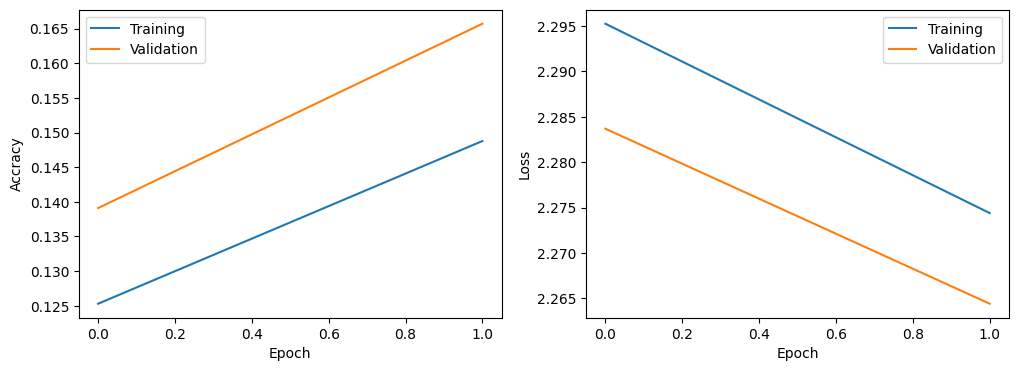

In [44]:
# Step1: 분류 CNN 모델링
class CNN(Model):
    # 모델에 사용될 구성 요소
    def __init__(self, nb_classes):
        super(CNN, self).__init__()
        self.nb_classes = nb_classes

        self.conv2D_A = Conv2D(32, kernel_size=(3, 3), activation='relu')
        self.conv2D_B = Conv2D(64, (3, 3), activation='relu')
        self.maxPooling2D_A = MaxPooling2D(pool_size=(2, 2))
        self.dropout_A = Dropout(0.25)
        self.flatten = Flatten()

        self.dense_A = Dense(128, activation='relu')
        self.dropout_B = Dropout(0.5)
        self.dense_B = Dense(nb_classes, activation='softmax', name='preds')
    
    # 모델 호출 시 사용되는 함수
    def call(self, x):
        h = self.conv2D_A(x)
        h = self.conv2D_B(h)
        h = self.maxPooling2D_A(h)
        h = self.dropout_A(h)
        h = self.flatten(h)

        h = self.dense_A(h)
        h = self.dropout_B(h)

        y = self.dense_B(h)

        return y

# Step1-2: 모델 사용준비
nb_classes = 10
model = CNN(nb_classes=nb_classes)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

# Step2: 분류 CNN을 위한 데이터 준비
## 주어진 데이터를 머신러닝에 사용하기 적합하도록 조정하는 기능인 DataSet클래스를 만듦
## 데이터 선언하고 초기화 진행 -> 입력값인 X를 멤버 변수로 지정한 후 채널정보 추가
class DataSet:
    def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
        self.X = X
        self.add_channels()
        X = self.X

        # the data, shuffled and split between train and test sets & 8:2비율
        X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X, y, test_size=0.2, random_state=random_state)
        
        print(X_train.shape, y_train.shape)

        # 이미지 데이터가 정수인 경우가 있으므로 32비트 규격의 실수로
        X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

        # * 들여쓰기 여기가 맞나
        # 스케일링 실시 - 기준은 학습 데이터인 X_train
        # 출력값은 원핫인코딩을 통해 정수값을 이진 벡터로 바꿔준다
        if scaling:
            # scaling to have (0, 1) for each feature )each pixel)
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            
            X_train = scaler.fit_transform(
                X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.transform(
                X_test.reshape(n, -1)).reshape(X_test.shape)
            
            self.scaler = scaler
        
        print('X_train shape: ', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')
        
        # convert class vectors to binary class matrices
        ## Nb_classes는 클래스 수 - 클래스 수만큼 이진 원소를 가진 벡터로 바꿔준다
        ## 학습과 검증에 사용할 데이터를 멤버변수로 등록한다
        Y_train = keras.utils.to_categorical(y_train, nb_classes)
        Y_test = keras.utils.to_categorical(y_test, nb_classes)

        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, y_test

    def add_channels(self):
        X = self.X

        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape

            # 흑백 이미지인지 검사 - th시애노 방식(요즘은 사용안하는 옛날 방식이긴 함)
            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:] # channel is already included
        
        self.X = X
        self.input_shape = input_shape


# step2-2: 데이터 load
(X, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
nb_classes = 10
data = DataSet(X, y, nb_classes)
print('data.input_shape', data.input_shape)

# 만들어진 데이터 써서, CNN모델로 간단하게 학습
epochs, batch_size, verbose = 2, 128, 1
history = model.fit(data.X_train, data.Y_train, 
                    batch_size=batch_size, epochs=epochs, verbose=verbose, 
                    validation_data=(data.X_test, data.Y_test))

# step3: 분류 CNN의 학습 및 성능 평가를 위한 머신 클래스 (상위 개념 클래스)
class Machine():
    # 클래스 초기화
    def __init__(self, X, y, nb_classes=2, fig=True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig
    # 데이터 설정 함수
    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print('data.input_shape', self.data.input_shape)
    # 모델 선정 함수
    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = CNN(nb_classes=nb_classes)
        self.model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    # 학습 진행 멤버 함수
    def fit(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model

        history = model.fit(data.X_train, data.Y_train, 
                            batch_size=batch_size, epochs=epochs, verbose=verbose, 
                            validation_data=(data.X_test, data.Y_test))
        return history
    # 성능 평가 전체를 진행하는 함수
    def run(self, epochs=100, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        fig = self.fig
        
        # 함수 내에서 학습과 성능 평가를 담당하는 history
        history = self.fit(epochs=epochs, batch_size=batch_size, verbose=verbose)
        score = model.evaluate(data.X_test, data.Y_test, verbose=0)

        print('Confusion matrix')
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))

        print('Test score: ', score[0])
        print('Test accuracy: ', score[1])

        # 결과물 저장 - 현재 시각을 초 단위로 구해 이름 생성
        suffix = sfile.unique_filename('datatime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        skeras.save_history_history('history_history.npy', history.history, fold=foldname)
        model.save_weights(os.path.join(foldname, 'dl_model.weights.h5'))
        print('Output results are saved in', foldname)

        if fig:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            skeras.plot_acc(history)
            plt.subplot(1, 2, 2)
            skeras.plot_loss(history)
            plt.show()
        
        self.history = history

        return foldname
        
# step4: 분류 CNN의 학습 및 성능 평가 수행
## 분류 CNN을 위한 머신에 기반하여 이미지 분류
assert keras.backend.image_data_format() == 'channels_last'

# from kerasapp import aicnn
class MyMachine(Machine):
    def __init__(self):
        (X, y), (x_test, y_test) = datasets.cifar10.load_data()
        super(MyMachine, self).__init__(X, y, nb_classes=10)

def main():
    m = MyMachine()
    m.run(epochs=2)

main()